In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Leitura dos dados
df_train = pd.read_csv('../data/raw/application_train.csv')
df_test = pd.read_csv('../data/raw/application_test.csv')

In [32]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Exploração inicial dos dados

In [34]:
print(df_train.shape)
print(df_train.dtypes.value_counts())
df_train['TARGET'].value_counts(normalize=True)

(307511, 122)
float64    65
int64      41
object     16
Name: count, dtype: int64


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [35]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Visualização do target

Text(0.5, 0, '0 = Cumpre | 1 = Descumpre')

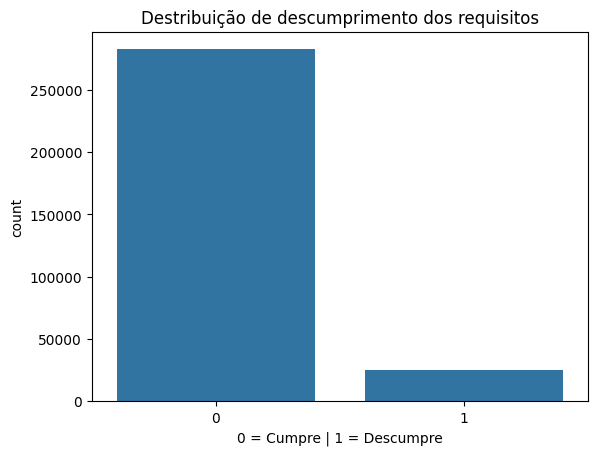

In [36]:
sns.countplot(data=df_train, x='TARGET')
plt.title('Destribuição de descumprimento dos requisitos')
plt.xlabel('0 = Cumpre | 1 = Descumpre')

Tratamento de valores ausentes

In [37]:
missing = df_train.isnull().mean().sort_values(ascending=False)

missing_cols = missing[missing>0.5]
print(f'Colunas com mais de 50% de valores ausentes: {missing_cols}')

Colunas com mais de 50% de valores ausentes: COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
BASEMENTAREA_MODE           0.585160
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
NONLIVINGAREA_AVG           0.

In [38]:
# input da media pra valores nulos em features numericas
df_train['AMT_INCOME_TOTAL'].fillna(df_train['AMT_INCOME_TOTAL'].mean(), inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_12660\1867317616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['AMT_INCOME_TOTAL'].fillna(df_train['AMT_INCOME_TOTAL'].mean(), inplace=True)


In [39]:
# Lista de colunas importantes para manter
important_columns = [
    'OWN_CAR_AGE', 
    'EXT_SOURCE_1', 
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
    'HOUSETYPE_MODE'
]

In [40]:
# Remove as colunas com mais de 50% do valor ausente
cols_to_drop = [col for col in missing_cols.index if col not in important_columns]
df_train = df_train.drop(columns=cols_to_drop)

In [41]:
# tratando os valores nulos mantidos
# OWN_CAR_AGE: Sem carro = 0
df_train['OWN_CAR_AGE'].fillna(0, inplace=True)

# EXT_SOURCE_1: Média
df_train['EXT_SOURCE_1'].fillna(df_train['EXT_SOURCE_1'].mean(), inplace=True)

# YEARS_BUILD: Média
for col in ['YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI']:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

# LIVINGAREA: Média
for col in ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE']:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

# HOUSETYPE_MODE: "Unknown"
df_train['HOUSETYPE_MODE'].fillna('Unknown', inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_12660\1764058664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['OWN_CAR_AGE'].fillna(0, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_12660\1764058664.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## Análise Exploratória de Dados (EDA)

In [42]:
print("Formato do dataset:", df_train.shape)
print(df_train.dtypes)

Formato do dataset: (307511, 90)
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 90, dtype: object


In [43]:
print(df_train.isnull().sum().sort_values(ascending=False))

FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
                                 ...  
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_21                     0
Length: 90, dtype: int64


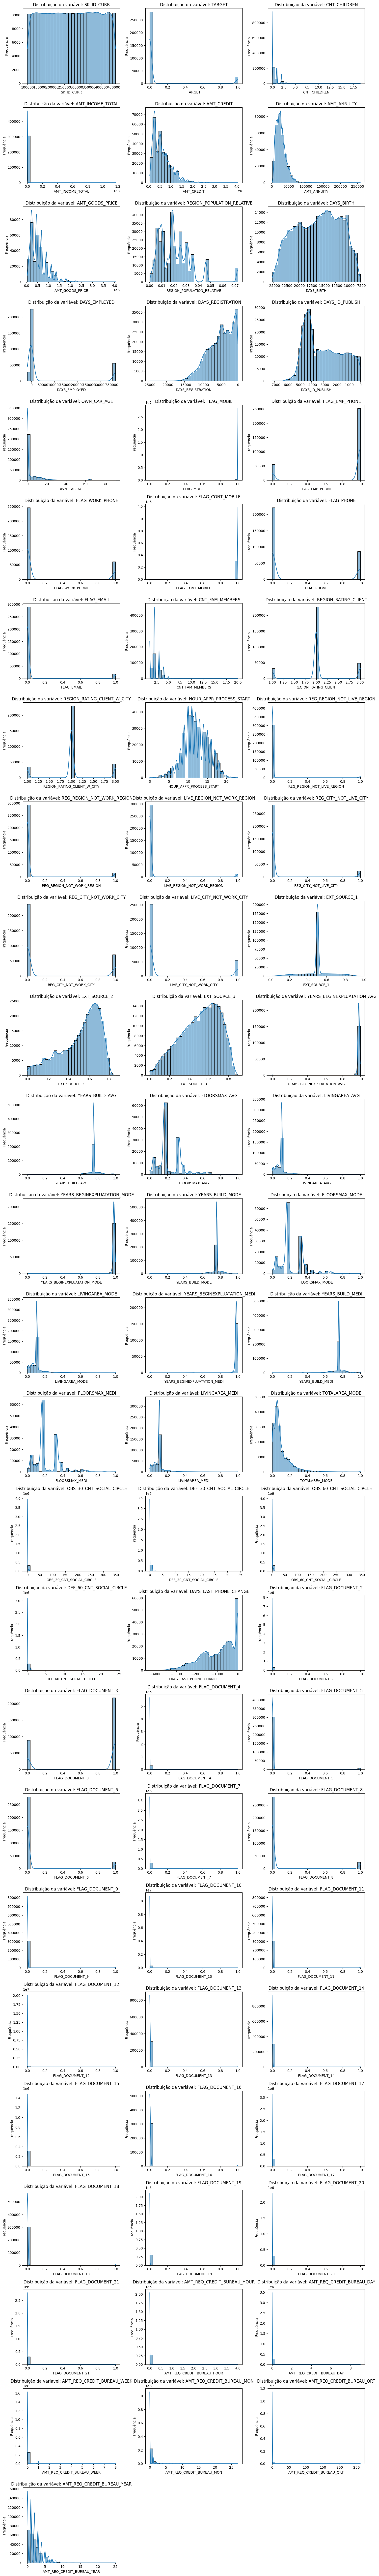

In [44]:
# lista das variaveis numericas
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3 
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # calcula o número de linhas necessárias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() 

# histograma para cada feature numérica
for i, col in enumerate(numerical_features):
    sns.histplot(df_train[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição da variável: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# remove eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

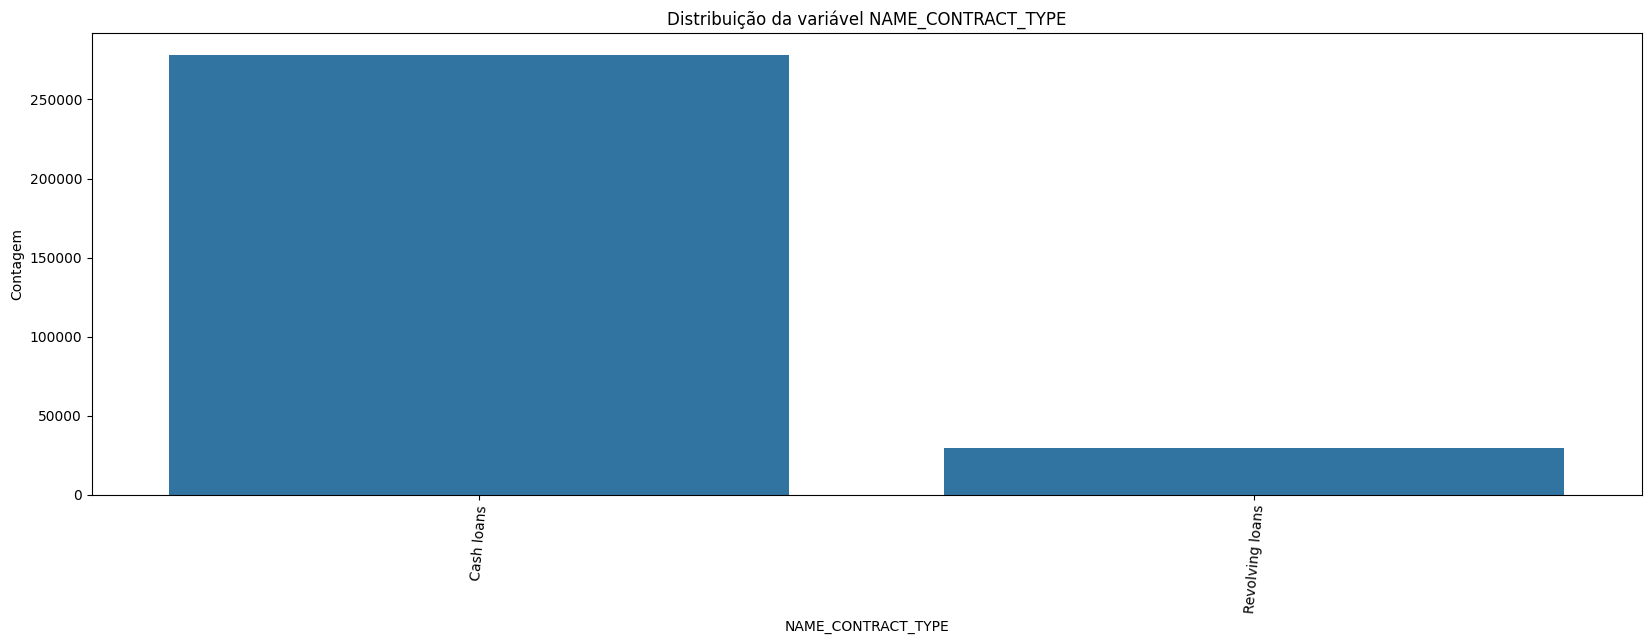

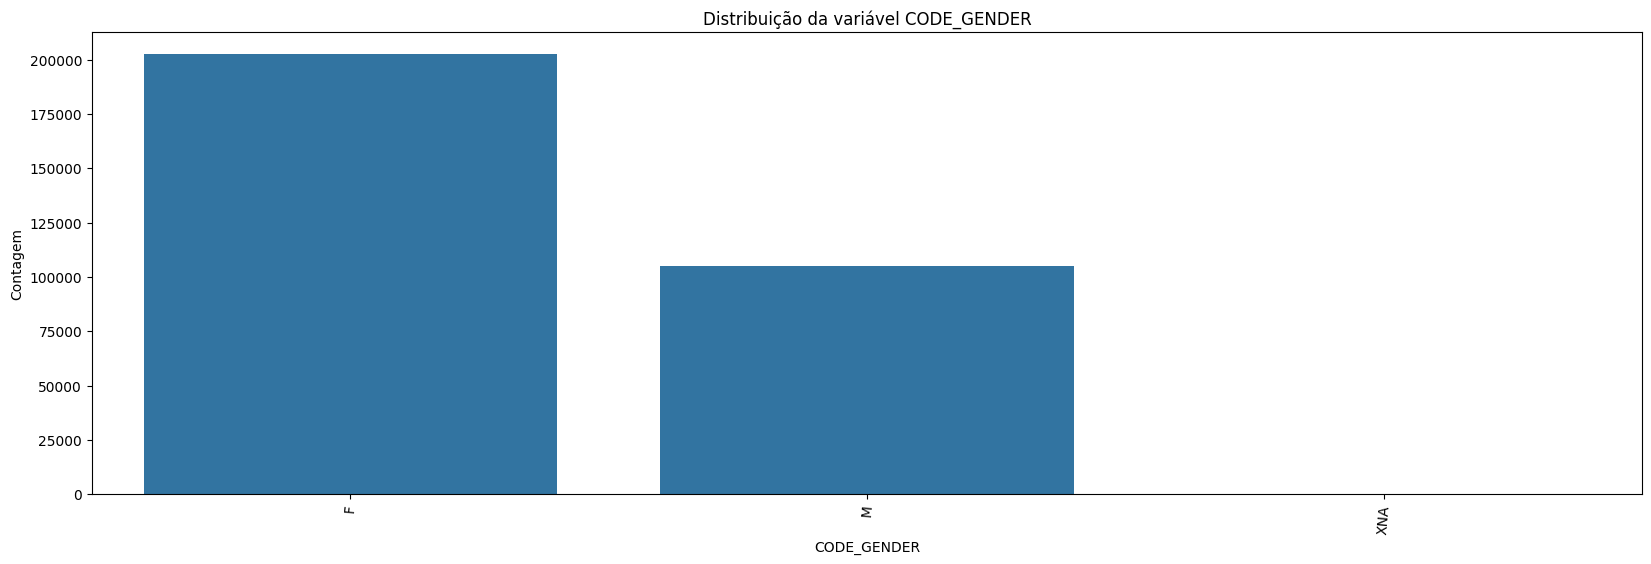

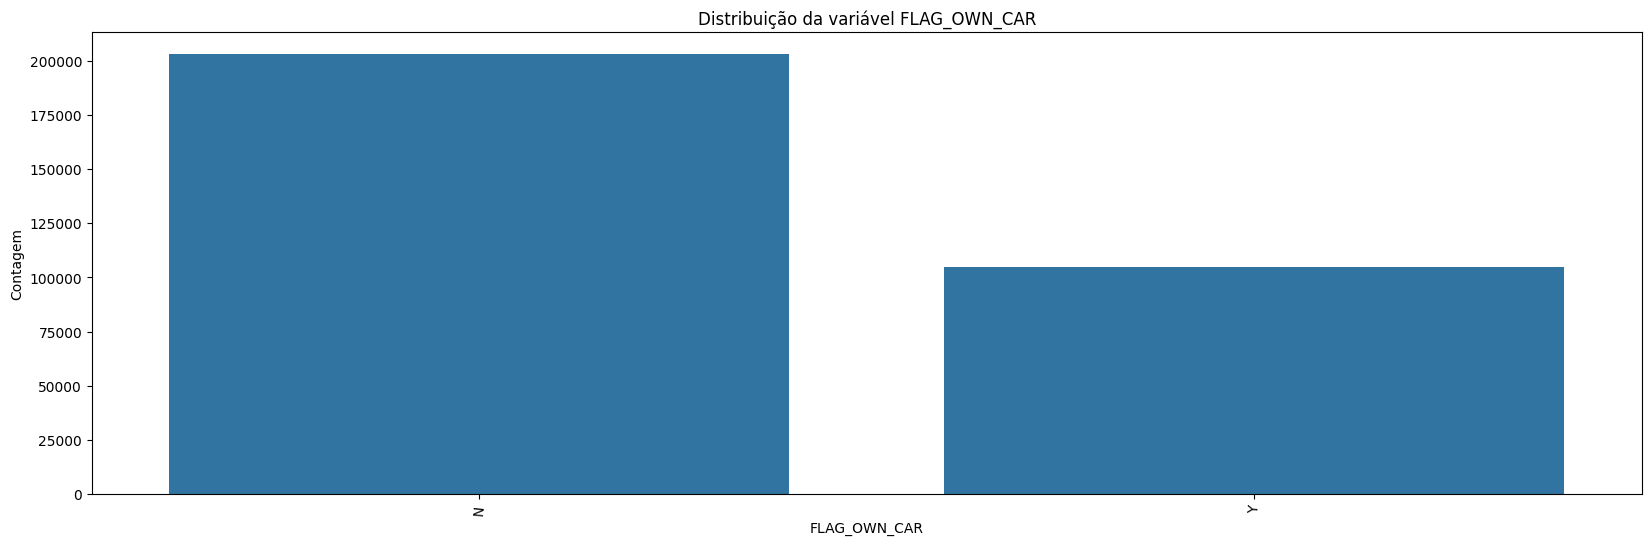

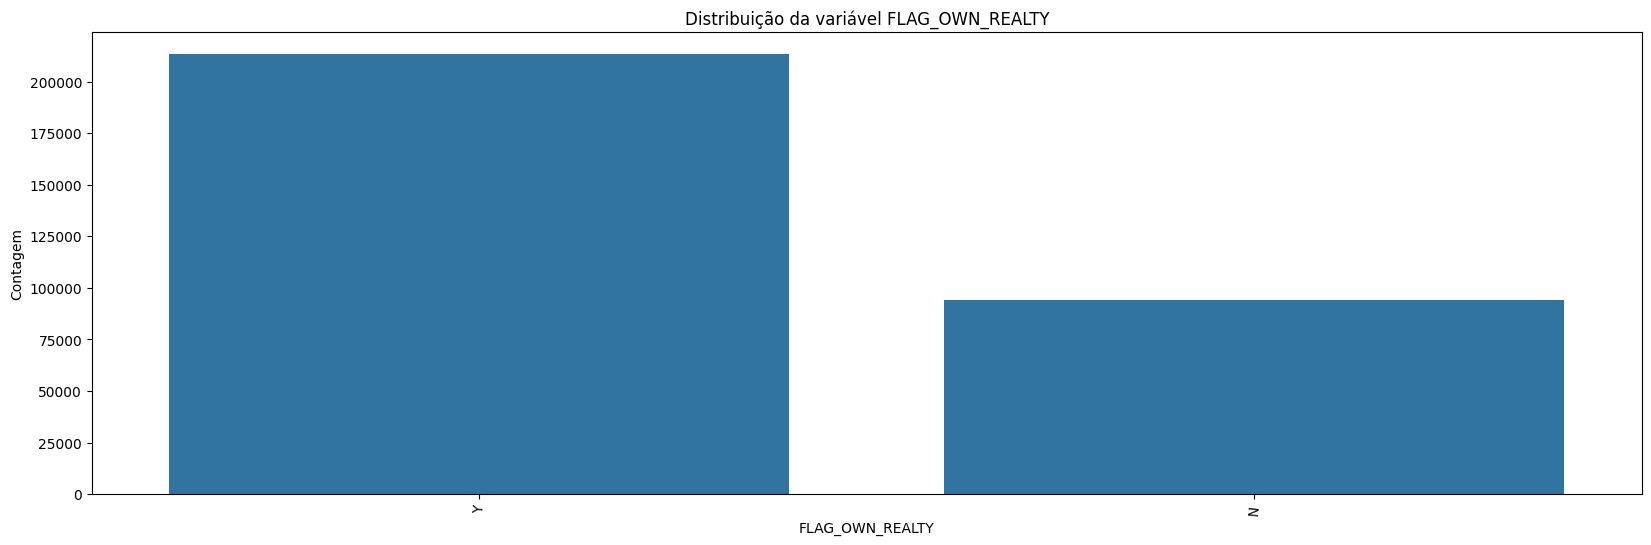

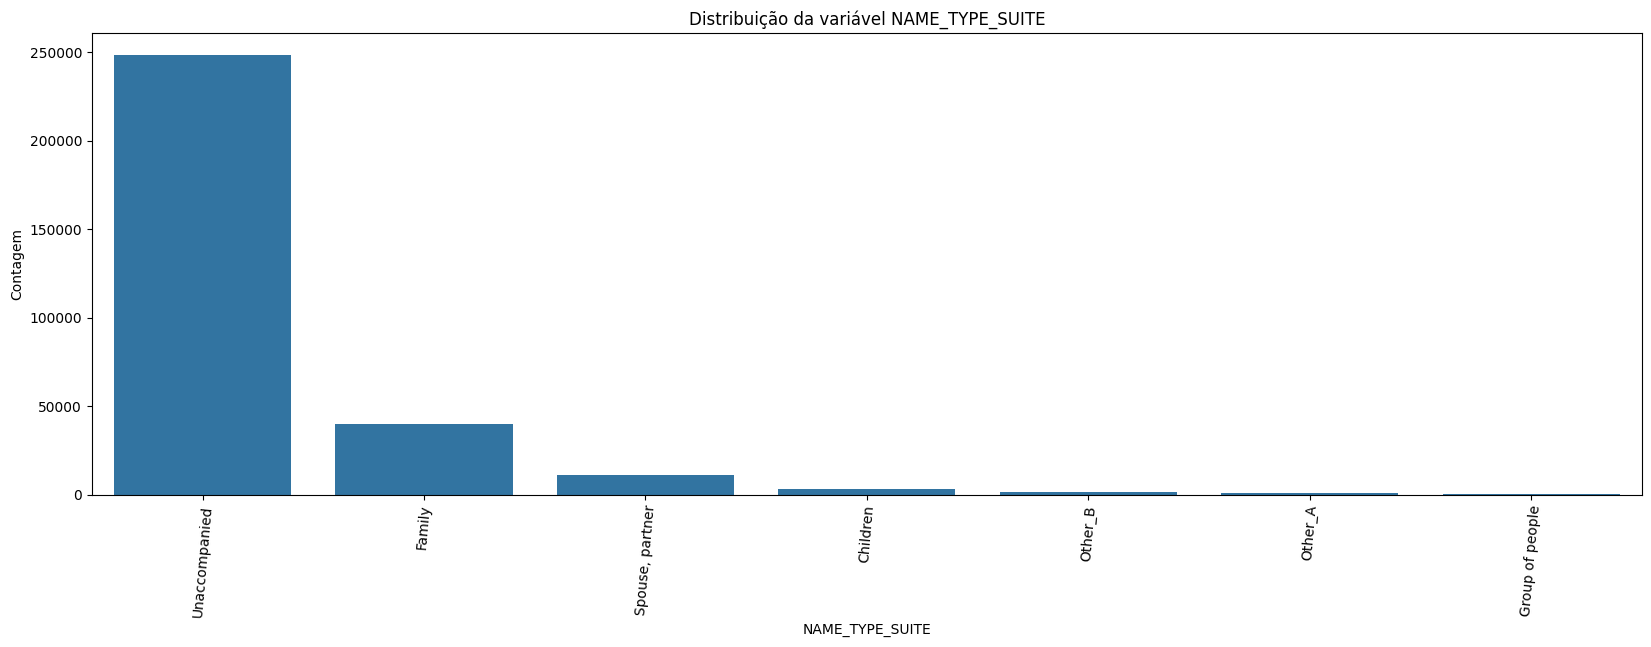

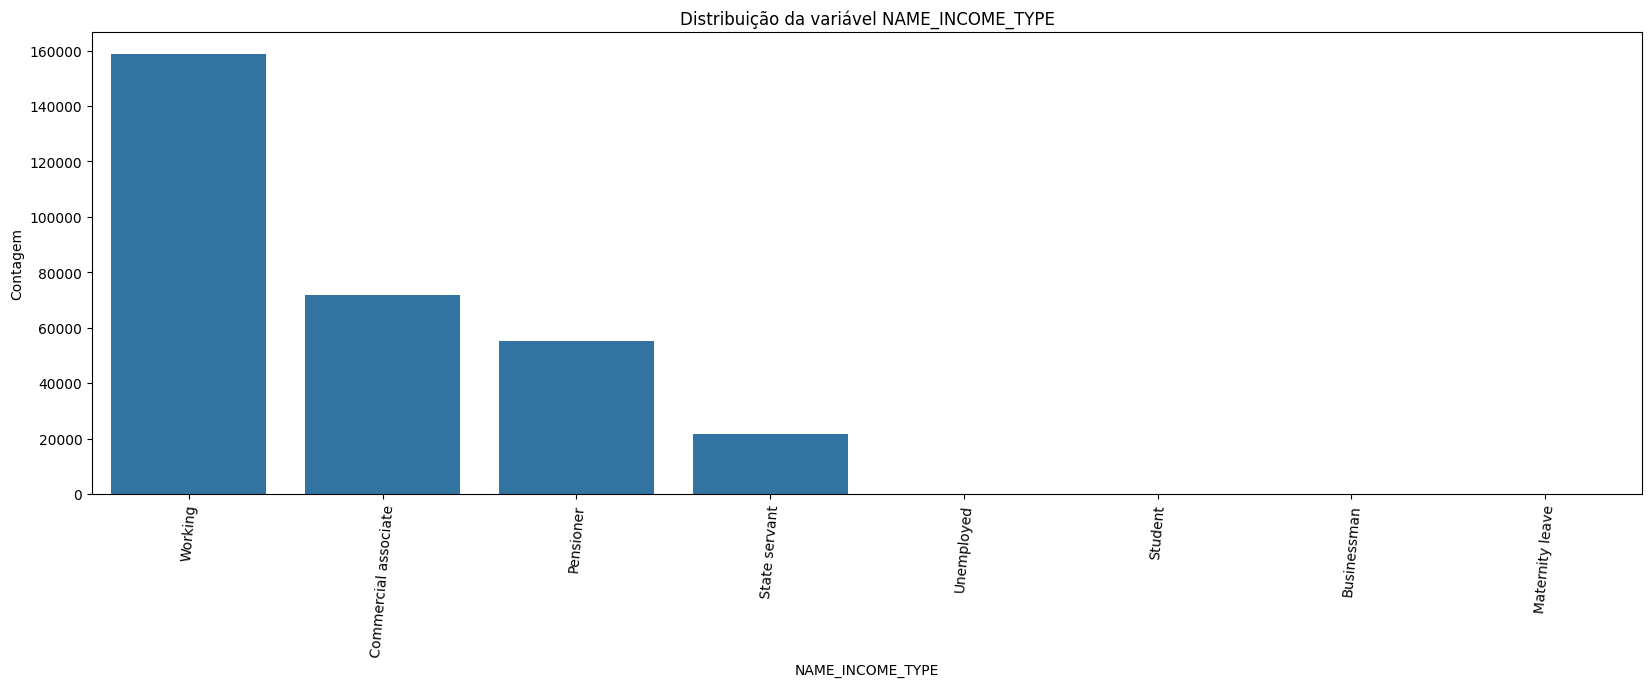

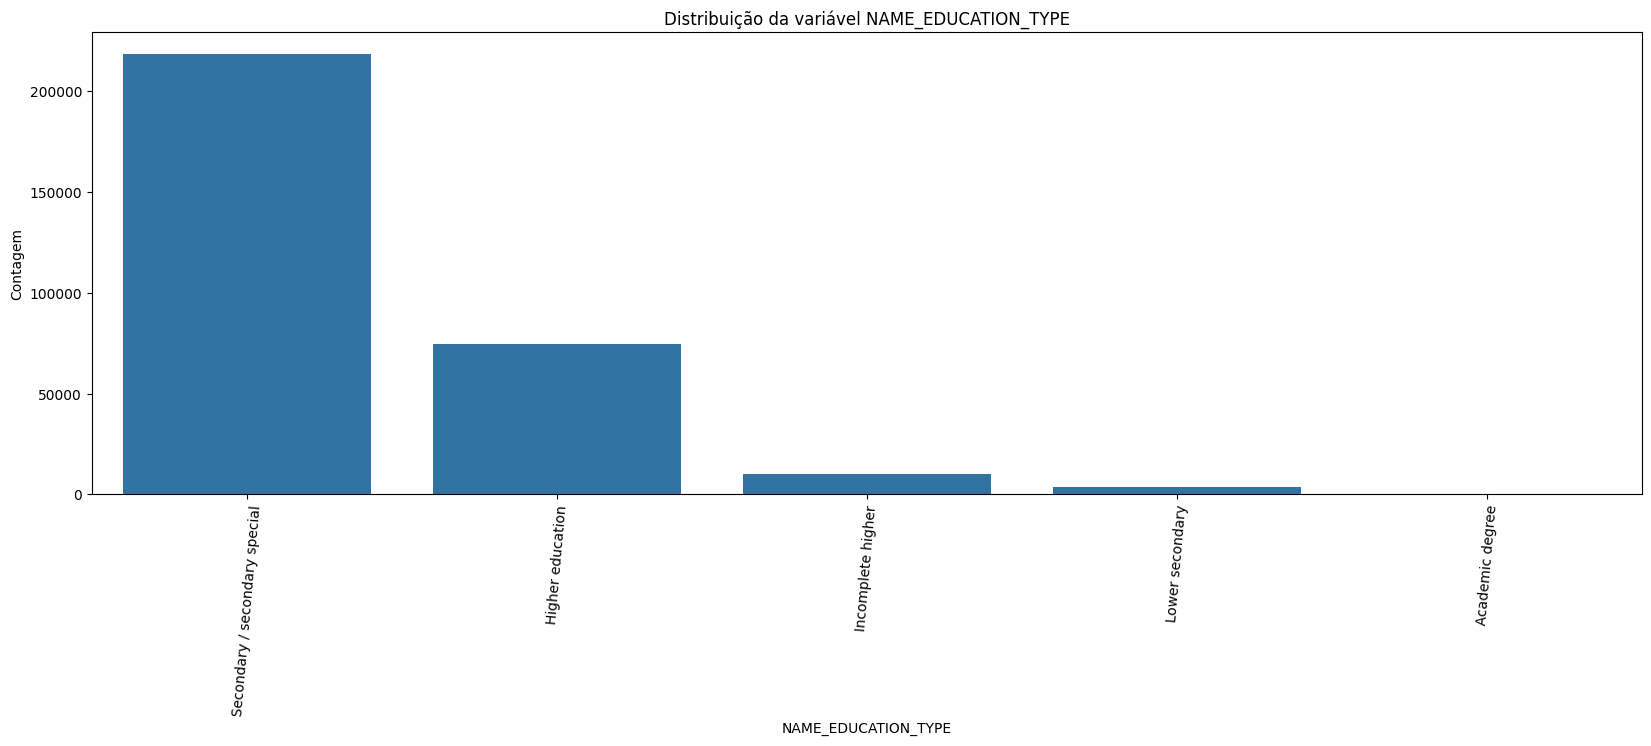

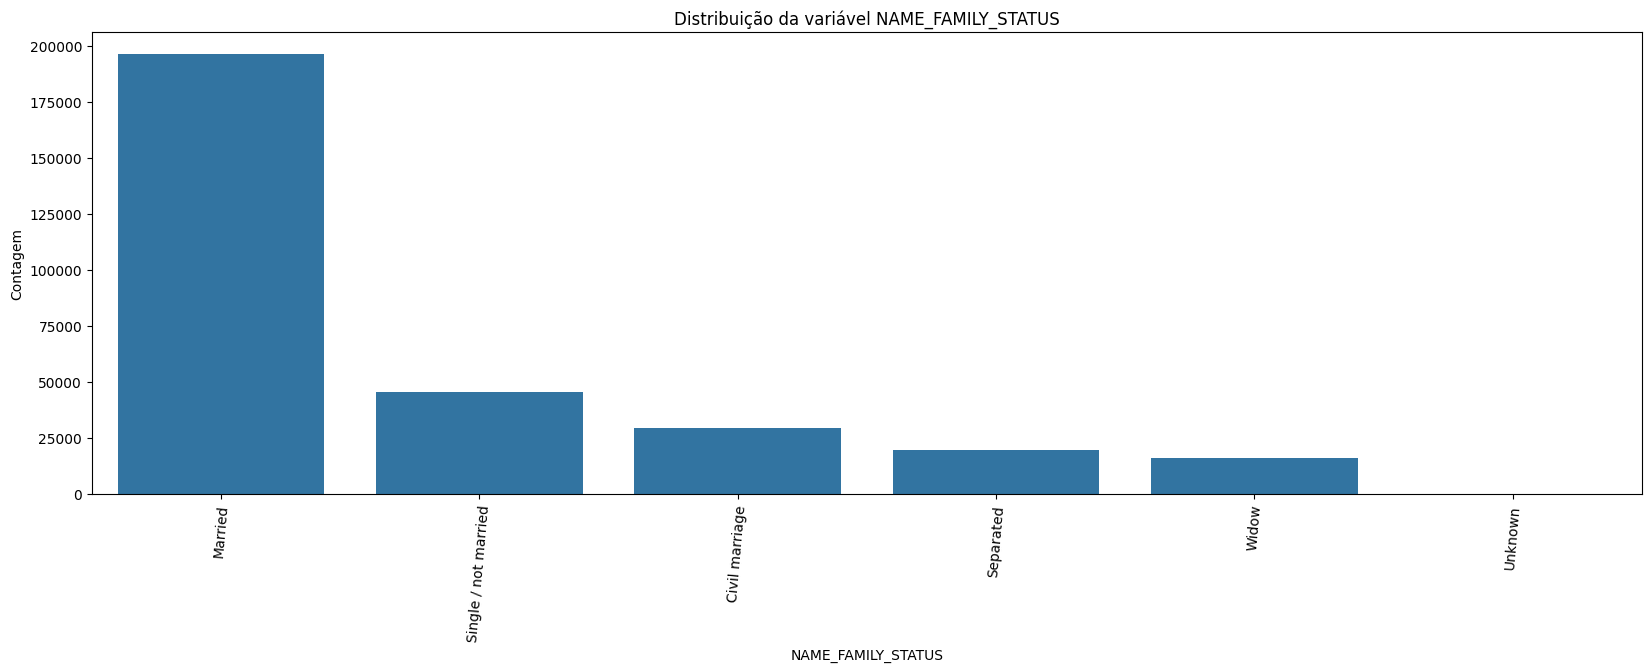

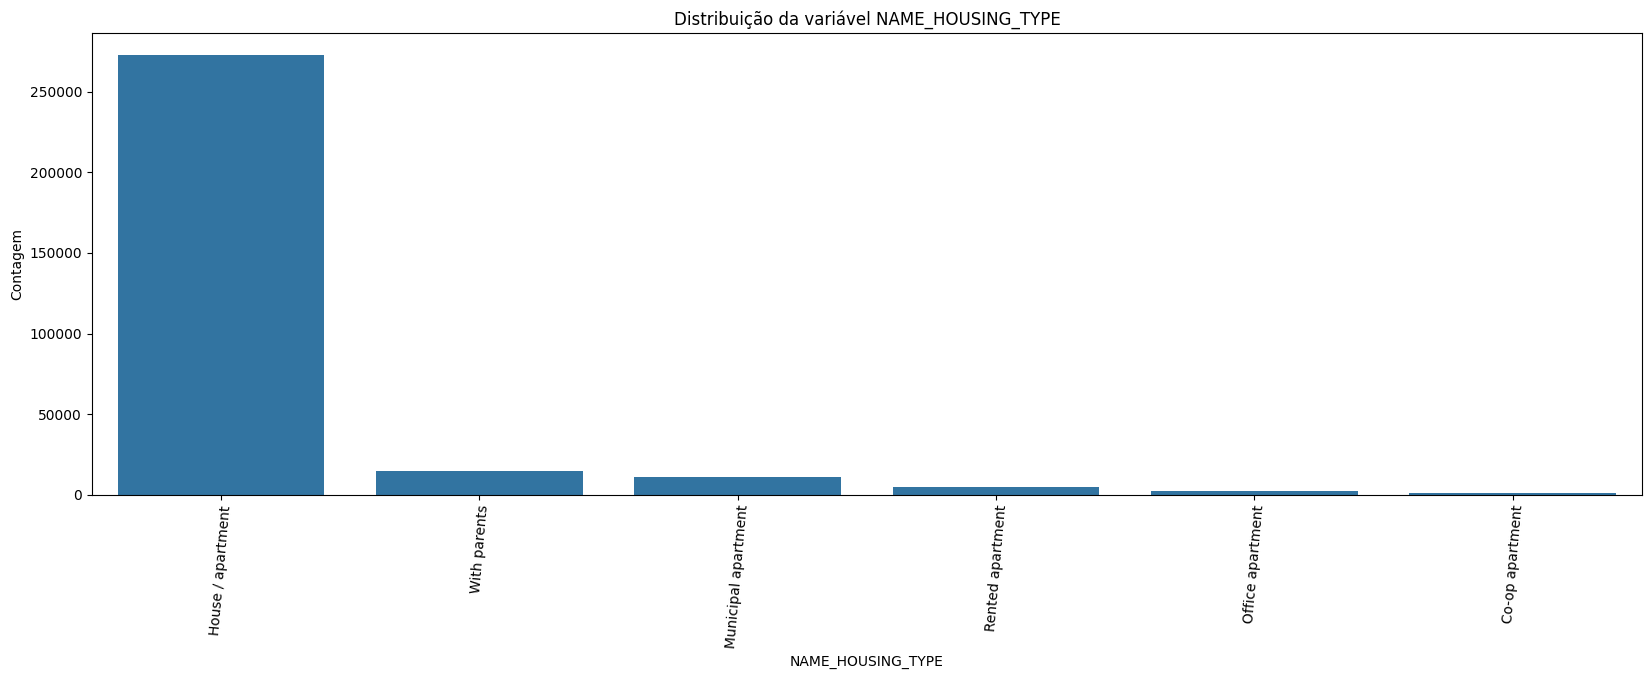

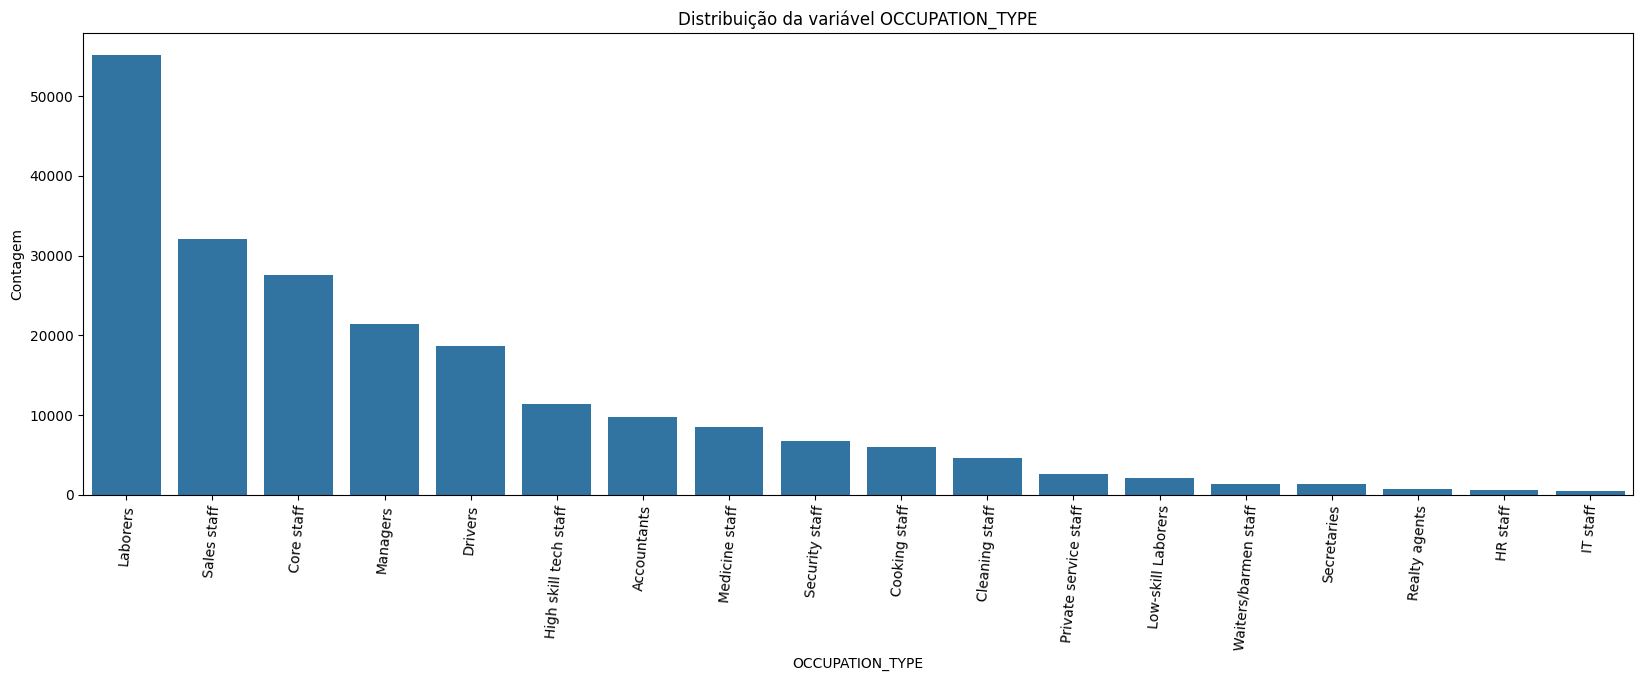

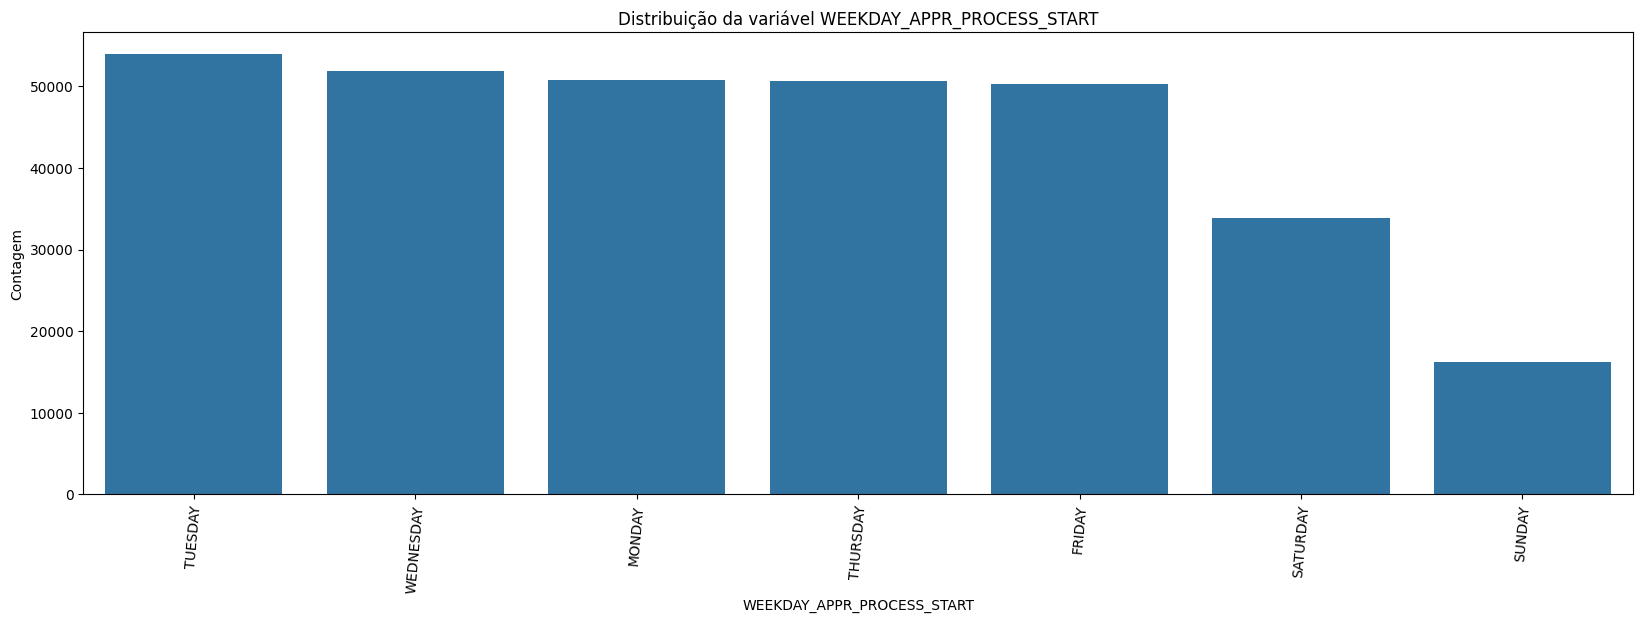

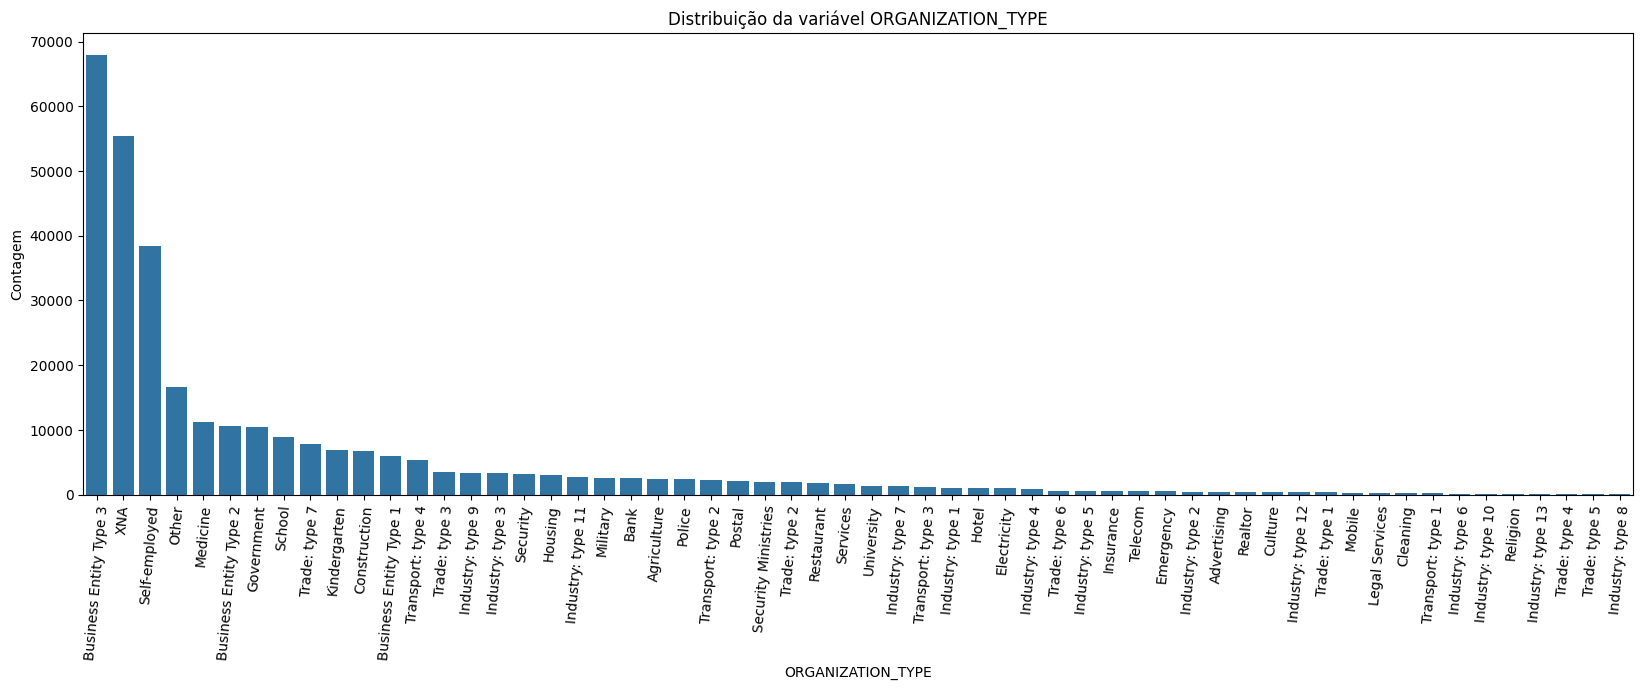

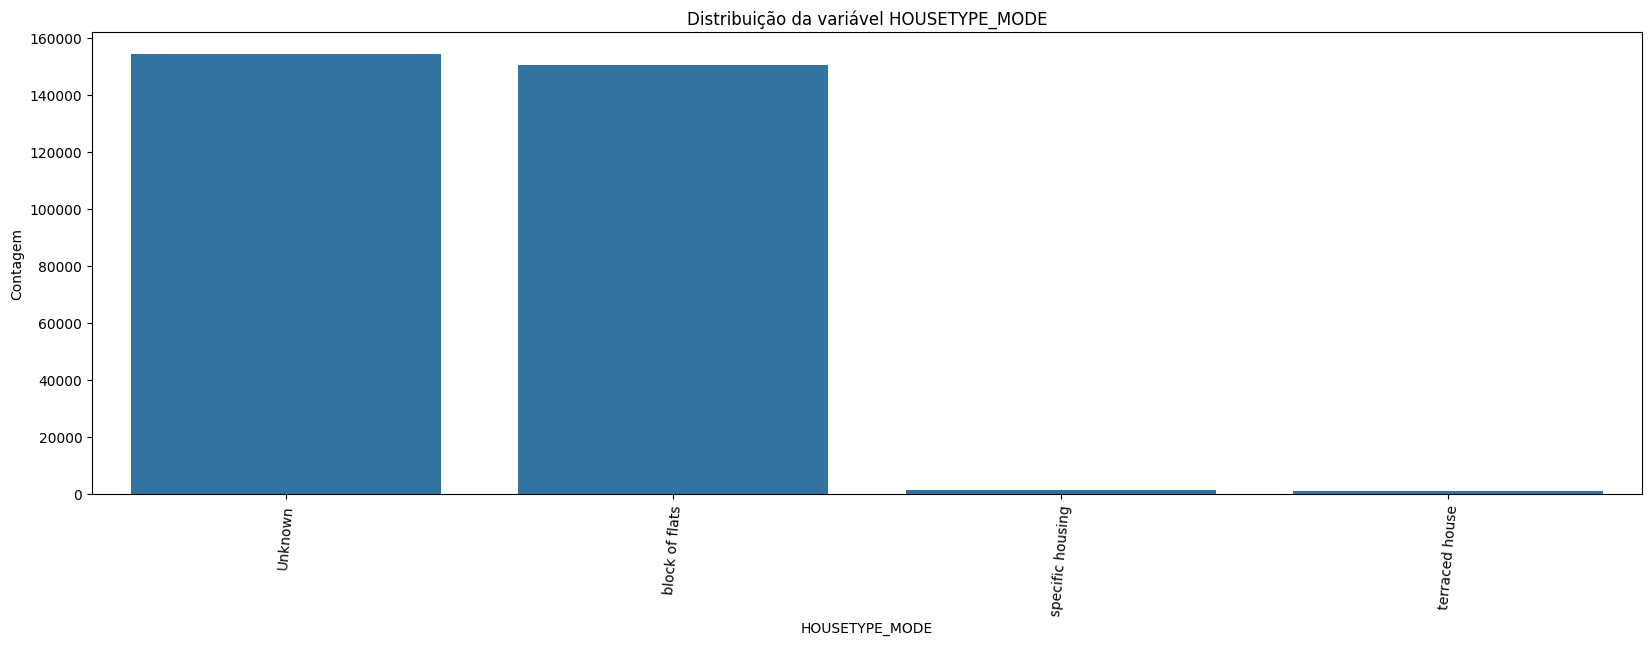

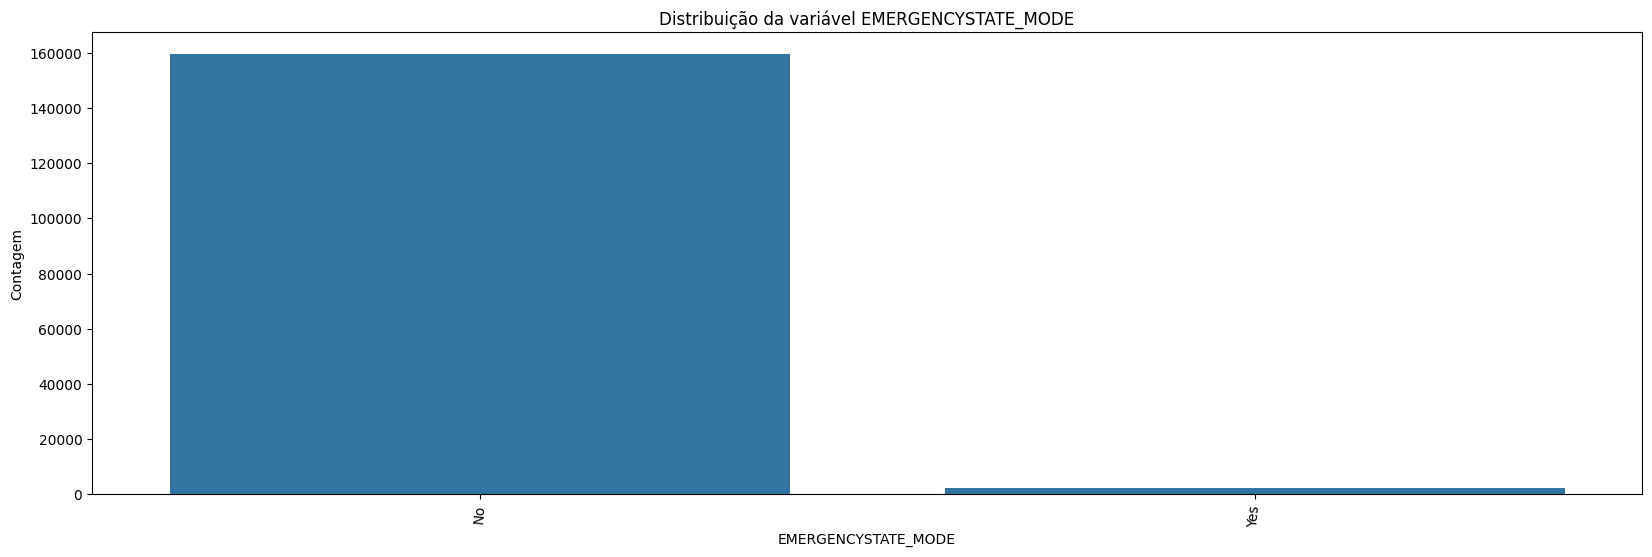

In [45]:
categorical_features = df_train.select_dtypes(include=['object']).columns

for col in categorical_features:
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, data=df_train, order=df_train[col].value_counts().index)
    plt.title(f'Distribuição da variável {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=85)
    plt.show()

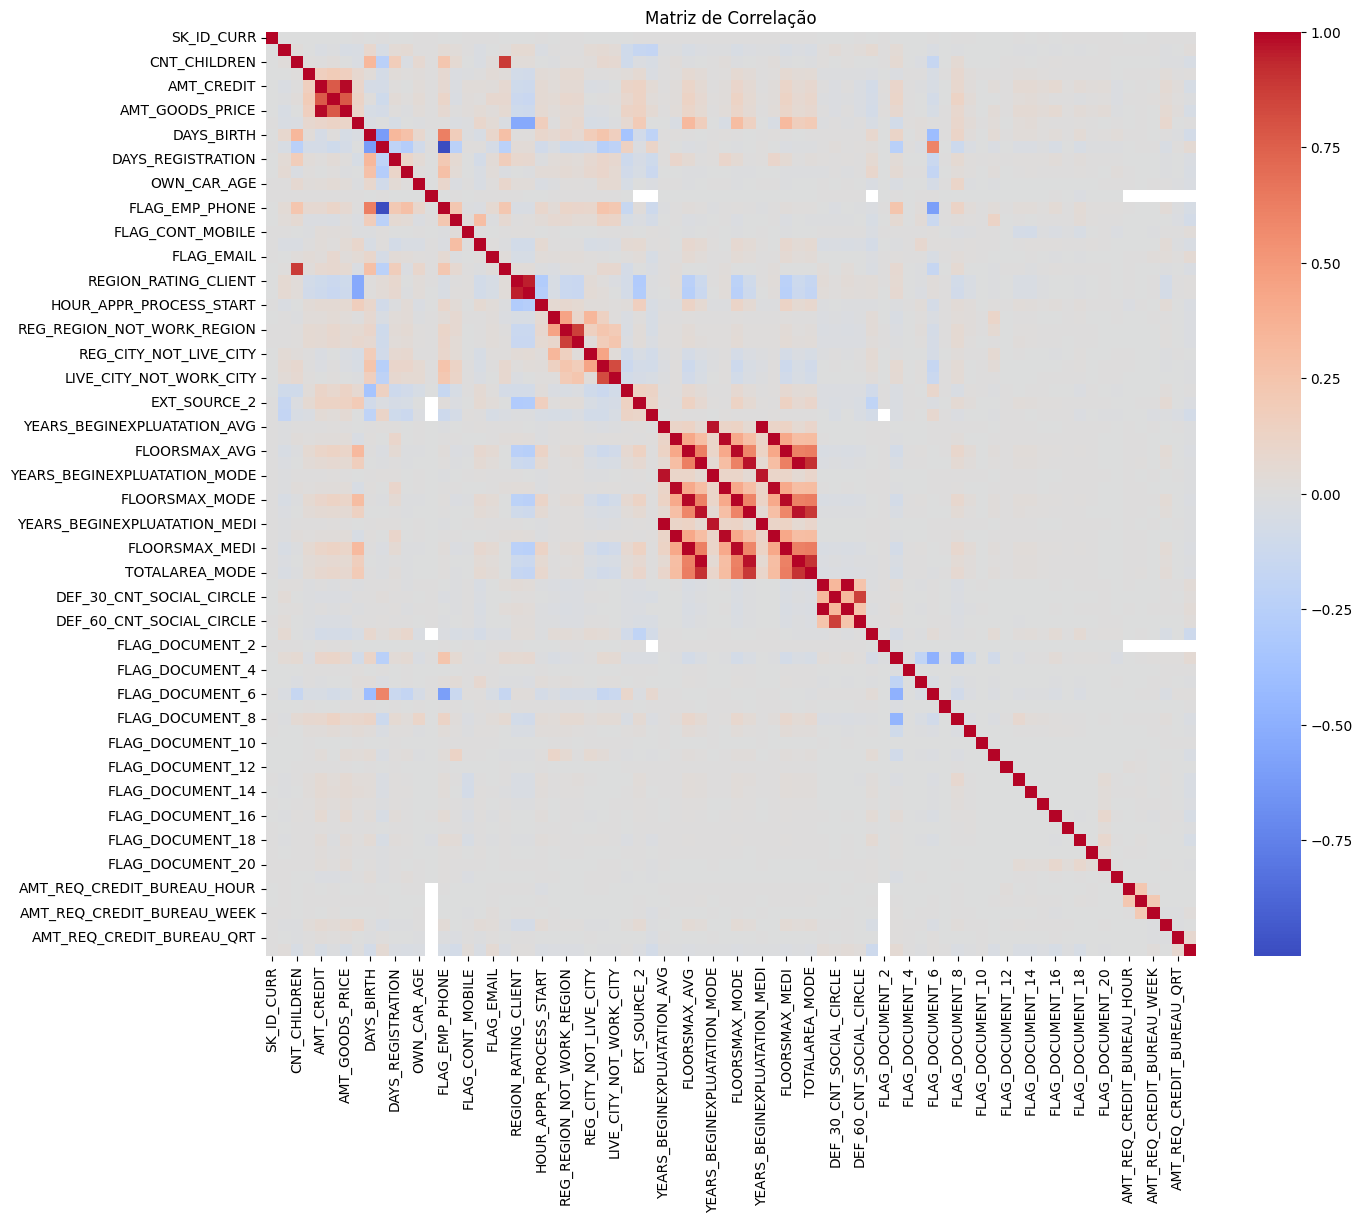

In [46]:
# verificando correlação apenas para colunas numéricas
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

# plot
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()

In [47]:
# limite de correlação forte
limiar_correlacao = 0.8

correlacoes_fortes = corr_matrix[(corr_matrix.abs() > limiar_correlacao) & (corr_matrix.abs() < 0.99)]
pares_correlacionados = []
for i in range(correlacoes_fortes.shape[0]):
    for j in range(i):
        if abs(correlacoes_fortes.iloc[i,j]) > limiar_correlacao:
            pares_correlacionados.append((correlacoes_fortes.index[i], correlacoes_fortes.columns[j], correlacoes_fortes.iloc[i,j]))

print(f'Encontrados {len(pares_correlacionados)} pares com correlação > {limiar_correlacao}:')
for var1, var2, correlacao in pares_correlacionados:
    print(f'{var1} - {var2}: {correlacao:.2f}')

Encontrados 17 pares com correlação > 0.8:
AMT_GOODS_PRICE - AMT_CREDIT: 0.99
CNT_FAM_MEMBERS - CNT_CHILDREN: 0.88
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT: 0.95
LIVE_REGION_NOT_WORK_REGION - REG_REGION_NOT_WORK_REGION: 0.86
LIVE_CITY_NOT_WORK_CITY - REG_CITY_NOT_WORK_CITY: 0.83
YEARS_BEGINEXPLUATATION_MODE - YEARS_BEGINEXPLUATATION_AVG: 0.97
YEARS_BUILD_MODE - YEARS_BUILD_AVG: 0.99
FLOORSMAX_MODE - FLOORSMAX_AVG: 0.99
LIVINGAREA_MODE - LIVINGAREA_AVG: 0.97
YEARS_BEGINEXPLUATATION_MEDI - YEARS_BEGINEXPLUATATION_MODE: 0.96
YEARS_BUILD_MEDI - YEARS_BUILD_MODE: 0.99
FLOORSMAX_MEDI - FLOORSMAX_MODE: 0.99
LIVINGAREA_MEDI - LIVINGAREA_MODE: 0.97
TOTALAREA_MODE - LIVINGAREA_AVG: 0.91
TOTALAREA_MODE - LIVINGAREA_MODE: 0.89
TOTALAREA_MODE - LIVINGAREA_MEDI: 0.91
DEF_60_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE: 0.86


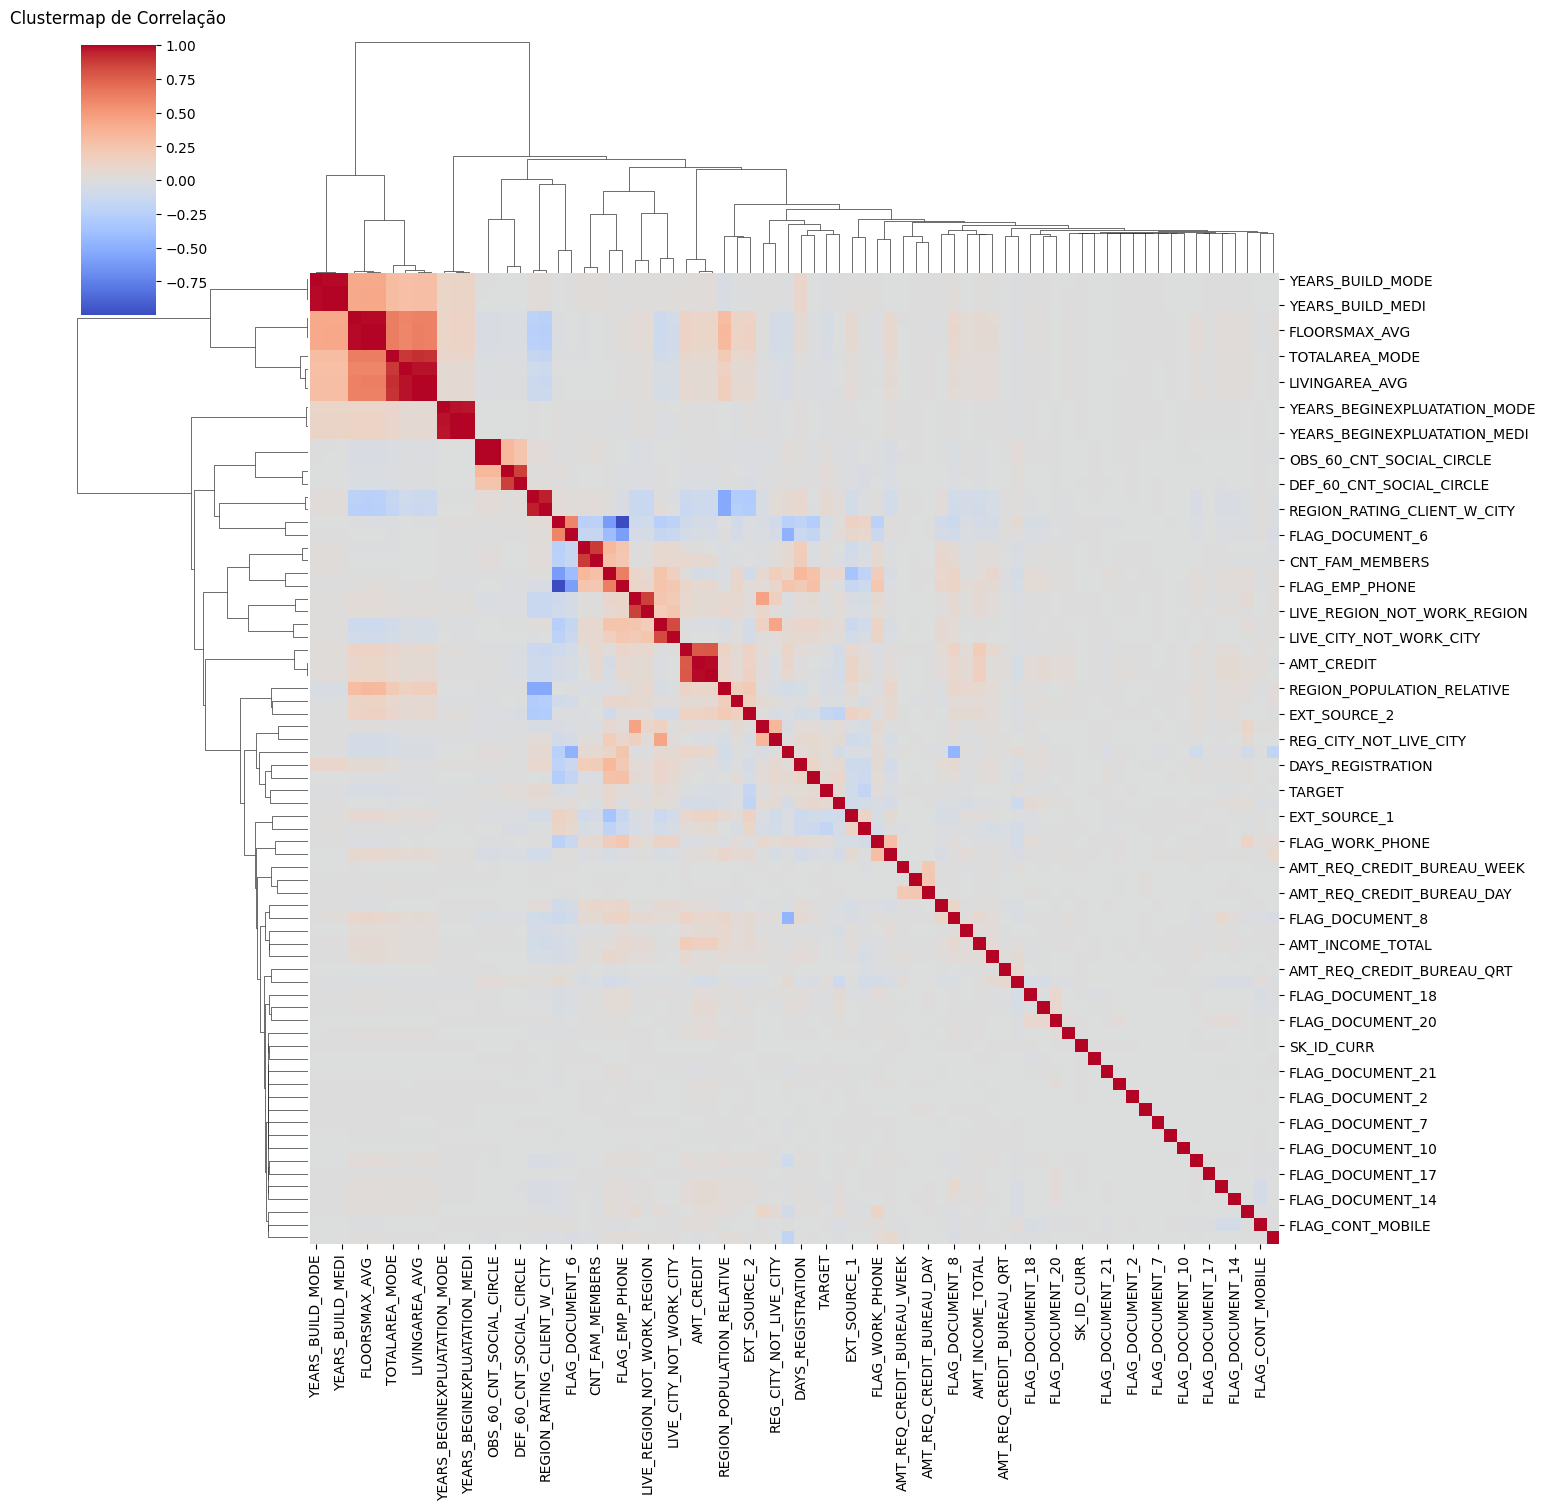

In [48]:
corr_matrix_filled = corr_matrix.fillna(0)

# cluster de correlações fortes
sns.clustermap(
    corr_matrix_filled,
    method='ward',
    cmap='coolwarm',
    figsize=(15, 15),
    center=0,
    annot=False
)
plt.title('Clustermap de Correlação', y=1.05)
plt.show()

In [49]:
# colunas altamente correlacionadas
high_corr_features = [
    'YEARS_BUILD_MODE',
    'YEARS_BUILD_MEDI',
    'FLOORSMAX_AVG',
    'TOTALAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BEGINEXPLUATATION_MEDI'
]

# removendo as colunas do dataframe
df_train.drop(columns=high_corr_features, inplace=True)

print("Colunas removidas:", high_corr_features)
print("Novo shape do dataframe:", df_train.shape)

Colunas removidas: ['YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'FLOORSMAX_AVG', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']
Novo shape do dataframe: (307511, 84)


In [50]:
# identificar colunas com valores nulos
null_counts = df_train.isnull().sum()

# filtrando apenas colunas que têm nulos
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print("Colunas com valores nulos:\n")
print(null_counts)


Colunas com valores nulos:

FLOORSMAX_MODE                 153020
FLOORSMAX_MEDI                 153020
YEARS_BEGINEXPLUATATION_AVG    150007
EMERGENCYSTATE_MODE            145755
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
NAME_TYPE_SUITE                  1292
OBS_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
dtype: int64


In [51]:
# separando numéricas e categóricas com nulos

# lista de colunas numéricas com nulos
num_cols_with_nulls = [col for col in null_counts.index if df_train[col].dtype in ['float64', 'int64']]

# lista de colunas categóricas com nulos
cat_cols_with_nulls = [col for col in null_counts.index if df_train[col].dtype == 'object']

print("Numéricas com nulos:", num_cols_with_nulls)
print()
print("Categóricas com nulos:", cat_cols_with_nulls)


Numéricas com nulos: ['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

Categóricas com nulos: ['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']


In [52]:
from sklearn.impute import SimpleImputer

# preenchendo valores numéricos com mediana
num_imputer = SimpleImputer(strategy='median')
df_train[num_cols_with_nulls] = num_imputer.fit_transform(df_train[num_cols_with_nulls])

# preenchendo valores categóricos com o valor mais frequente
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_cols_with_nulls] = cat_imputer.fit_transform(df_train[cat_cols_with_nulls])

print("Preenchimento de nulos finalizado!")
print("Total de valores nulos restantes:", df_train.isnull().sum().sum())

Preenchimento de nulos finalizado!
Total de valores nulos restantes: 0


## Feature Engeneering

| Nova Feature                          | Formula para criar                     | Por que pode ser útil?                          |
|---------------------------------------|----------------------------------------|-------------------------------------------------|
| Renda por pessoa                     | AMT_INCOME_TOTAL / CNT_FAM_MEMBERS   | Mede a renda individual média                   |
| Anos de Emprego                       | DAYS_EMPLOYED / 365                | Traz experiência no mercado                    |
| Idade do Cliente                      | DAYS_BIRTH / -365                    | Idade real (positiva)                          |
| Dias desde última mudança de telefone | DAYS_LAST_PHONE_CHANGE / -365        | Pode indicar estabilidade                      |
| Relação entre valor do bem e da renda | AMT_GOODS_PRICE / AMT_INCOME_TOTAL   | Capacidade de compra                           |

In [53]:
# renda individual 
df_train['INCOME_PER_PERSON'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
# anos de emprego
df_train['YEARS_EMPLOYED'] = df_train['DAYS_EMPLOYED'] / -365
# idade do cliente
df_train['AGE_YEARS'] = df_train['DAYS_BIRTH'] / -365
# dias desde a última mudança de telefone
df_train['YEARS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'] / -365
# relação valor do bem pela renda
df_train['GOODS_INCOME_RATIO'] = df_train['AMT_GOODS_PRICE'] / df_train['AMT_INCOME_TOTAL']
